# The Explorers - Sprint 4 - Project Notebook

# Libraries

In [ ]:
# General
import pandas as pd
from collections import Counter

# Text Pre-processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import spacy
nlp = spacy.load('en_core_web_sm')

# Visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pyLDAvis
import pyLDAvis.lda_model

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation

# Machine Learning
from sklearn.model_selection import GridSearchCV


# Import Dataset

In [ ]:
# jobs_df = pd.read_csv('https://media.githubusercontent.com/media/jmgang/the-explorers-project-notebooks/main/data/job_postings.csv')
# jobs_df.head(3)

In [ ]:
jobs_df = pd.read_csv(r'C:\Users\hecto\Projects\Python\Eskwelabs\S4\Group Project\the-explorers-project-notebooks\data\job_postings.csv')
jobs_df.head(3)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644


In [ ]:
def clean_data(jobs_df):
    # Drop columns: 'max_salary', 'med_salary' and 22 other columns
    jobs_df = jobs_df.drop(columns=['max_salary', 'med_salary', 'min_salary', 'pay_period', 'formatted_work_type', 'location', 'applies', 'original_listed_time', 'views', 'remote_allowed', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency', 'compensation_type', 'scraped'])
    # Filter rows based on column: 'title'
    jobs_df = jobs_df[jobs_df['title'].str.contains("engineer", na=False, case=False)]
    # Change column type to string for columns: 'description', 'title'
    jobs_df = jobs_df.astype({'description': 'string', 'title': 'string'})
    return jobs_df

engg_jobs_df = clean_data(jobs_df.copy())
engg_jobs_df.reset_index(drop=True, inplace=True)
engg_jobs_df.head()

,job_id,company_id,title,description
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...


# Extract Description & Tokenize Text

In [ ]:
# Extracting the job description from the dataset
job_description = engg_jobs_df['description'].str.cat(sep=' ')

In [ ]:
# Tokenize the reviews
tokens = word_tokenize(job_description)

## Text preprocessing & basic text statistics

In [ ]:
tokens = [word.lower() for word in tokens
          if word not in stopwords.words('english')
          and word.isalpha()] # word not in string.punctuation

In [ ]:
# len(tokens)

1104931

In [ ]:
word_counts = nltk.FreqDist(tokens)

print("Top 10 words by frequency:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")

Top 10 words by frequency:
experience: 12398
work: 9168
engineering: 9131
team: 6937
design: 6874
we: 6262
technical: 5619
development: 5385
data: 5341
systems: 4898


## Barchart of top 10 frequent words

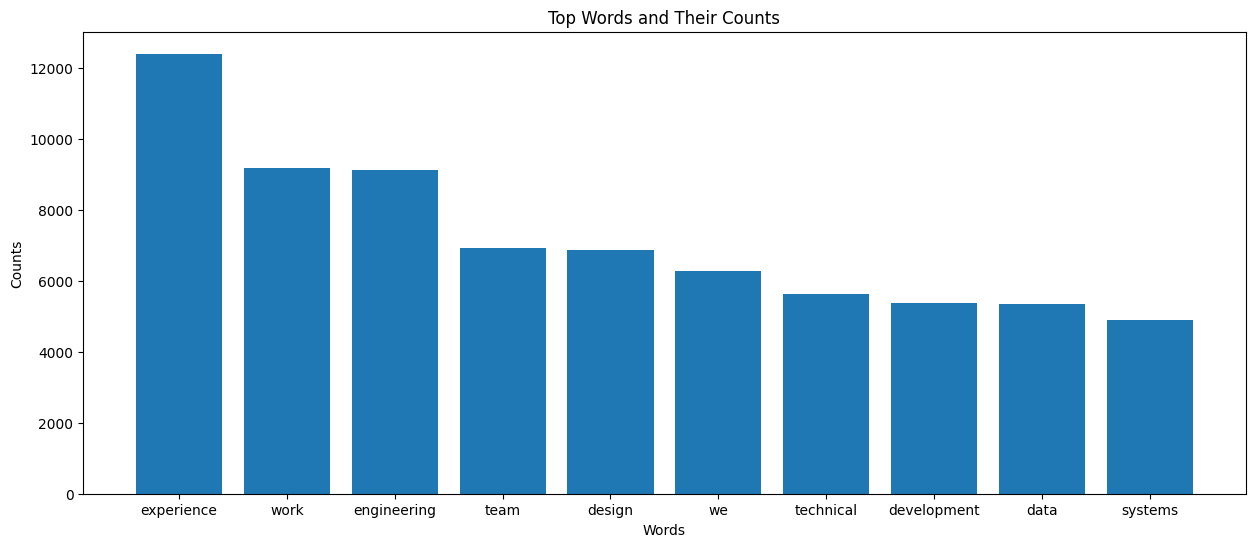

In [ ]:
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 6))
plt.bar(words, counts)
plt.title('Top Words and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## Wordcloud of Job Description

c:\Users\hecto\miniconda3\envs\eskwelabss4\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


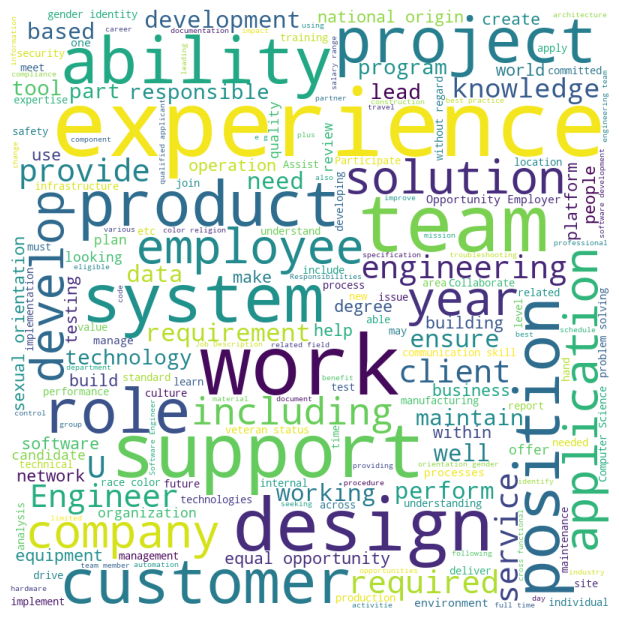

In [ ]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

generate_wordcloud(job_description)

# Text Pre-Processing (NLTK)

## Tokenization

In [ ]:
# Define function for tokenizing text
def tokenize_text(text):
    return word_tokenize(text)

In [ ]:
engg_jobs_df['tokens'] = engg_jobs_df['description'].apply(tokenize_text)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore..."


## Removing stop words, punctuation marks, and noise

In [ ]:
# Set up stopwords
stop_words = set(stopwords.words('english'))

# Define function for noise removal
def remove_stopwords_punctuation_noise(tokens):
    return [word for word in tokens if word.lower() not in stop_words
            and word.lower() not in string.punctuation and word.isalpha()]

# Apply noise removal
engg_jobs_df['tokens_no_stopwords'] = engg_jobs_df['tokens'].apply(remove_stopwords_punctuation_noise)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, militar..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, milit..."


## Stemming

In [ ]:
# Set up PorterStemmer
ps = PorterStemmer()

# Define a function for stemming
def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

# Apply stemming
engg_jobs_df['stemmed_tokens'] = engg_jobs_df['tokens_no_stopwords'].apply(stem_tokens)

## Lemmatization

In [ ]:
# Set up WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
engg_jobs_df['lemmatized_tokens'] = engg_jobs_df['tokens_no_stopwords'].apply(lemmatize_tokens)

In [ ]:
# Define a function to get the POS tag for a word
def get_wordnet_pos(word):
    # Map POS tag to the first character used by the WordNetLemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}.get(tag, 'n')
    return tag

# Adjust lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word))
            for word in tokens]

# Text Pre-Processing (SpaCy)

## Tokenization

In [ ]:
# Define a function for tokenization
def spacy_tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization
engg_jobs_df['spacy_tokens'] = engg_jobs_df['description'].apply(spacy_tokenize_text)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[direct, hire, opportun, control, engin, reput...","[Direct, Hire, opportunity, Controls, Engineer...","[Head-huntress.com, has, a, Direct, Hire, oppo..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, lead, electr, engin, join, dynam, team,...","[seeking, Lead, Electrical, Engineer, join, dy...","[We, 're, seeking, a, Lead, Electrical, Engine..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, militar...","[us, premier, organ, forefront, militari, tech...","[Us, premier, organization, forefront, militar...","[About, Us, :, We, are, a, premier, organizati..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, milit...","[join, premier, organ, forefront, militari, te...","[Join, premier, organization, forefront, milit...","[Join, a, premier, organization, at, the, fore..."


## Removing stop words and punctuation marks

In [ ]:
# Define a function for noise removal
def spacy_remove_stopwords_punctuation(tokens):
    doc = nlp(' '.join(tokens))
    return [token.text for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]

# Apply removal of stop words and punctuation
engg_jobs_df['spacy_tokens_no_stopwords'] = engg_jobs_df['spacy_tokens'].apply(spacy_remove_stopwords_punctuation)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[direct, hire, opportun, control, engin, reput...","[Direct, Hire, opportunity, Controls, Engineer...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, lead, electr, engin, join, dynam, team,...","[seeking, Lead, Electrical, Engineer, join, dy...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, militar...","[us, premier, organ, forefront, militari, tech...","[Us, premier, organization, forefront, militar...","[About, Us, :, We, are, a, premier, organizati...","[premier, organization, forefront, cutting, ed..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, milit...","[join, premier, organ, forefront, militari, te...","[Join, premier, organization, forefront, milit...","[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti..."


## Lemmatization

In [ ]:
# Define a function for lemmatization
def spacy_lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply lemmatization
engg_jobs_df['spacy_lemmatized_tokens'] = engg_jobs_df['spacy_tokens_no_stopwords'].apply(spacy_lemmatize_tokens)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep...","[tsubaki, synonymous, excellence, quality, dep..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[direct, hire, opportun, control, engin, reput...","[Direct, Hire, opportunity, Controls, Engineer...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[Direct, Hire, opportunity, Controls, Engineer..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, lead, electr, engin, join, dynam, team,...","[seeking, Lead, Electrical, Engineer, join, dy...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, Lead, Electrical, Engineer, join, dynam..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, militar...","[us, premier, organ, forefront, militari, tech...","[Us, premier, organization, forefront, militar...","[About, Us, :, We, are, a, premier, organizati...","[premier, organization, forefront, cutting, ed...","[premier, organization, forefront, cut, edge, ..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, milit...","[join, premier, organ, forefront, militari, te...","[Join, premier, organization, forefront, milit...","[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organization, forefront, cut, ..."


# NLTK vs SpaCy

In [ ]:
# Get the frequency of top 10 tokens in lemmatized_tokens column in engg_jobs_df
top_10_tokens_nltk = engg_jobs_df['lemmatized_tokens'].explode().value_counts().head(10)
print(top_10_tokens_nltk)


lemmatized_tokens
experience     9631
team           8739
work           8213
design         6496
system         6148
project        5795
engineering    5222
technical      5159
year           4973
development    4777
Name: count, dtype: int64


In [ ]:
# Get the frequency of top 10 tokens in spacy_lemmatized_tokens column in engg_jobs_df
top_10_tokens_spacy = engg_jobs_df['spacy_lemmatized_tokens'].explode().value_counts().head(10)
print(top_10_tokens_spacy)


spacy_lemmatized_tokens
experience     12705
work           12043
team            9174
design          7629
include         7006
system          6654
project         6192
technical       5451
engineering     5339
support         5254
Name: count, dtype: int64


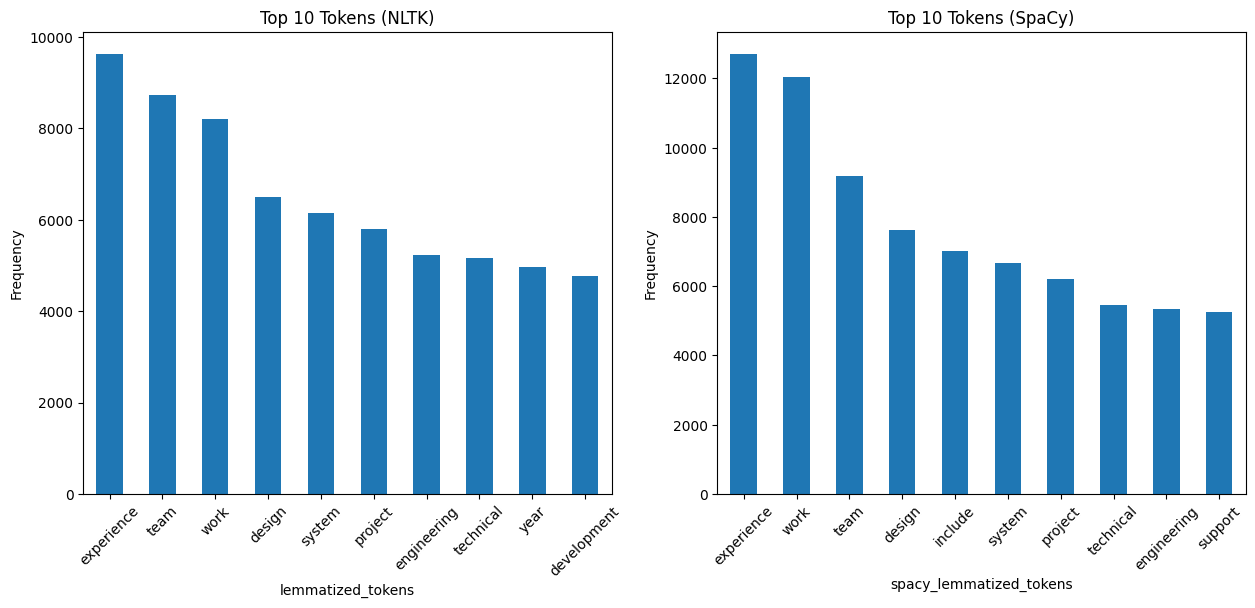

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for top 10 tokens in lemmatized_tokens column in engg_jobs_df
top_10_tokens_nltk.plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 10 Tokens (NLTK)')
axs[0].set_xticklabels(top_10_tokens_nltk.index, rotation=45)
axs[0].set_ylabel('Frequency')

# Bar chart for top 10 tokens in spacy_lemmatized_tokens column in engg_jobs_df
top_10_tokens_spacy.plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 10 Tokens (SpaCy)')
axs[1].set_xticklabels(top_10_tokens_spacy.index, rotation=45)
axs[1].set_ylabel('Frequency')

plt.show()


c:\Users\hecto\miniconda3\envs\eskwelabss4\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


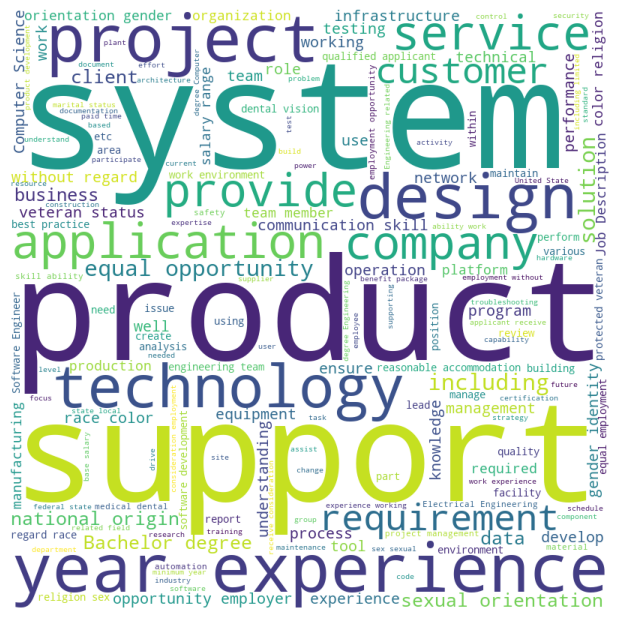

c:\Users\hecto\miniconda3\envs\eskwelabss4\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


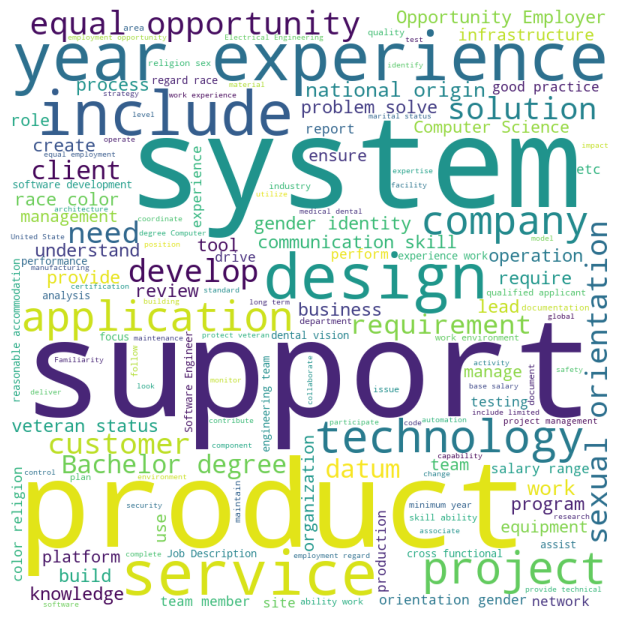

In [ ]:
# Define a function to generate a wordcloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

# Generate wordcloud for lemmatized_tokens
lemmatized_tokens_text = ' '.join(engg_jobs_df['lemmatized_tokens'].explode().tolist())
generate_wordcloud(lemmatized_tokens_text)

# Generate wordcloud for spacy_lemmatized_tokens
spacy_lemmatized_tokens_text = ' '.join(engg_jobs_df['spacy_lemmatized_tokens'].explode().tolist())
generate_wordcloud(spacy_lemmatized_tokens_text)


# N-grams Analysis

In [ ]:
tokens = nltk.word_tokenize(job_description)
tokens = [word.lower() for word in tokens if word not in stopwords.words('english')
          and word.isalpha()] # word not in string.punctuation

In [ ]:
n = 10 # set n to be the number of grams you want to look at e.g. 2 for bigrams, 3 for trigrams, etc.

n_grams = list(nltk.ngrams(tokens, n))
ngram_counts = nltk.FreqDist(n_grams)

print(f"\nTop {n} trigrams by frequency:")
for i, (ngram, freq) in enumerate(ngram_counts.most_common(n)):
    words = ' '.join(ngram)
    print(f"{i+1}. {words}: {freq}")



Top 10 trigrams by frequency:
1. qualified applicants receive consideration employment without regard race color religion: 235
2. all qualified applicants receive consideration employment without regard race color: 205
3. applicants receive consideration employment without regard race color religion sex: 187
4. race color religion sex sexual orientation gender identity national origin: 179
5. employer all qualified applicants receive consideration employment without regard race: 141
6. without regard race color religion sex sexual orientation gender identity: 136
7. regard race color religion sex sexual orientation gender identity national: 123
8. receive consideration employment without regard race color religion sex sexual: 115
9. consideration employment without regard race color religion sex sexual orientation: 115
10. employment without regard race color religion sex sexual orientation gender: 101


# Text Vectorization

In [ ]:
# count the frequency of the tokens in space_lemmatized_tokens
tokens = engg_jobs_df['spacy_lemmatized_tokens'].explode().tolist()
word_counts = nltk.FreqDist(tokens)

print("Top 10 words by frequency:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")


Top 10 words by frequency:
experience: 12705
work: 12043
team: 9174
design: 7629
include: 7006
system: 6654
project: 6192
technical: 5451
engineering: 5339
support: 5254


In [ ]:
# create a new column called processed_tokens which will concatenate spacy_lemmatized_tokens
engg_jobs_df['processed_tokens'] = engg_jobs_df['spacy_lemmatized_tokens'].apply(lambda x: ' '.join(x))
engg_jobs_df.head(3)

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens,processed_tokens
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep...","[tsubaki, synonymous, excellence, quality, dep...",tsubaki synonymous excellence quality dependab...
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[direct, hire, opportun, control, engin, reput...","[Direct, Hire, opportunity, Controls, Engineer...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[Direct, Hire, opportunity, Controls, Engineer...",Direct Hire opportunity Controls Engineer repu...
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, lead, electr, engin, join, dynam, team,...","[seeking, Lead, Electrical, Engineer, join, dy...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, Lead, Electrical, Engineer, join, dynam...",seek Lead Electrical Engineer join dynamic tea...


In [ ]:
# parameters
max_features = 50000
ngrams_min, ngrams_max = 1, 3
min_df = 0.1
max_df = 0.5

# Count
count_vectorizer = CountVectorizer(stop_words='english', max_features=max_features, min_df=min_df, max_df=max_df, ngram_range=(ngrams_min, ngrams_max))
count_dt_matrix = count_vectorizer.fit_transform(engg_jobs_df['processed_tokens'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features, min_df=min_df, max_df=max_df, ngram_range=(ngrams_min, ngrams_max))
tfidf_dt_matrix = tfidf_vectorizer.fit_transform(engg_jobs_df['processed_tokens'])

## Comparison

In [ ]:
# We can link up the two arrays of information (feature names and their total scores)
# by zipping them up using zip(), then transforming it into a dictionary using dict()

tfidf_scores = dict(zip(
    tfidf_vectorizer.get_feature_names_out(),
    tfidf_dt_matrix.toarray().sum(axis=0)
))

count_scores = dict(zip(
    count_vectorizer.get_feature_names_out(),
    count_dt_matrix.toarray().sum(axis=0)
))

In [ ]:
def generate_wordcloud(freq_dict):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10).generate_from_frequencies(freq_dict)

    return wordcloud
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

### Word Cloud

c:\Users\hecto\miniconda3\envs\eskwelabss4\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
c:\Users\hecto\miniconda3\envs\eskwelabss4\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


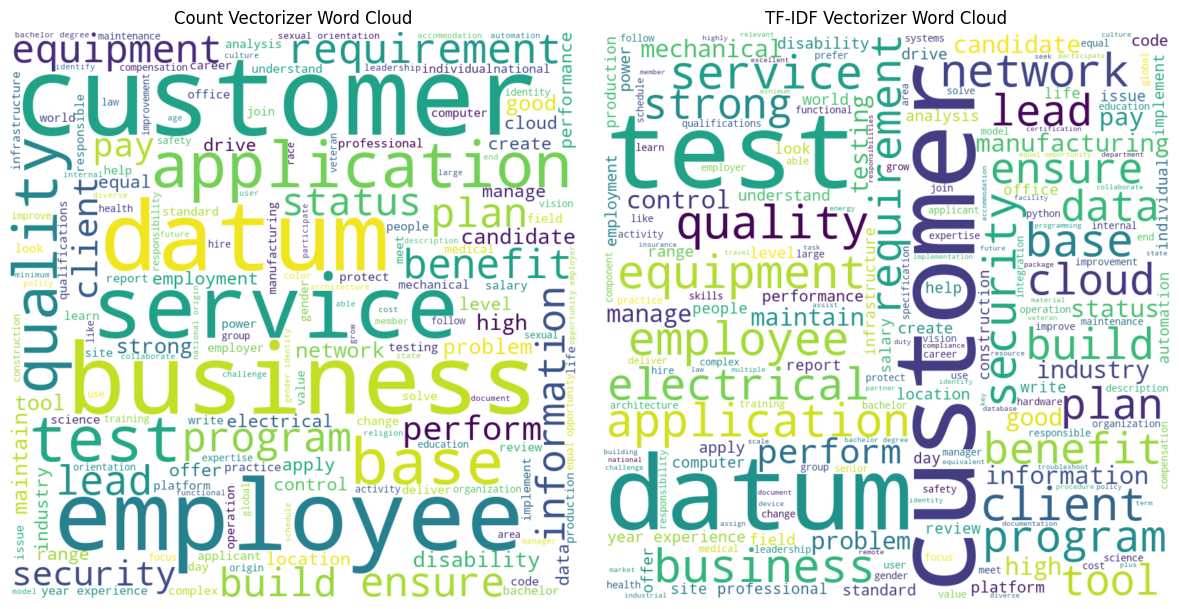

In [ ]:
# Create word clouds for Count and TF-IDF Vectorizers
positive_count_wordcloud = generate_wordcloud(count_scores)
positive_tfidf_wordcloud = generate_wordcloud(tfidf_scores)

# Plot the word clouds and word frequency visualizations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_count_wordcloud, interpolation='bilinear')
plt.title(f'Count Vectorizer Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(positive_tfidf_wordcloud, interpolation='bilinear')
plt.title(f'TF-IDF Vectorizer Word Cloud')
plt.axis("off")

plt.tight_layout()
plt.show()

### Bar-Chart

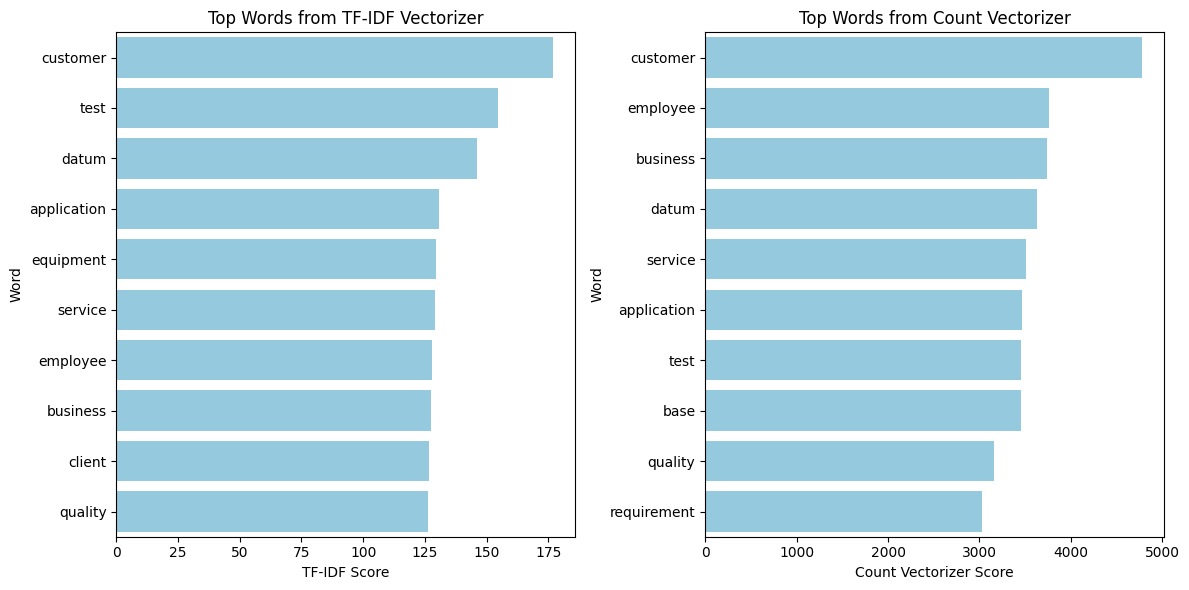

In [ ]:
# Function to get the top N important words from the vectorized data
def get_top_words(vectorized_data, vectorizer, n=10):
    feature_names = vectorizer.get_feature_names_out()
    sum_words = vectorized_data.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in zip(feature_names,
                                       range(sum_words.shape[1]))]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:n]
    return top_words

# Get the top N important words from TF-IDF Vectorizer and Count Vectorizer
top_words_tfidf = get_top_words(tfidf_dt_matrix, tfidf_vectorizer, n=10)
top_words_count = get_top_words(count_dt_matrix, count_vectorizer, n=10)

# Create dataframes for the top words
top_words_tfidf_df = pd.DataFrame(top_words_tfidf,
                                  columns=['Word', 'TF-IDF Score'])

top_words_count_df = pd.DataFrame(top_words_count,
                                  columns=['Word', 'Count Vectorizer Score'])

# Plot bar charts for the top words
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='TF-IDF Score', y='Word', data=top_words_tfidf_df, color='skyblue')
plt.title('Top Words from TF-IDF Vectorizer')
plt.xlabel('TF-IDF Score')

plt.subplot(1, 2, 2)
sns.barplot(x='Count Vectorizer Score', y='Word', data=top_words_count_df, color='skyblue')
plt.title('Top Words from Count Vectorizer')
plt.xlabel('Count Vectorizer Score')

plt.tight_layout()
plt.show()

# Topic Modelling

## Initialize LDA

In [ ]:
# Build a Latent Dirichlet Allocation Model
count_lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_count= count_lda_model.fit_transform(count_dt_matrix)

tfidf_lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf= tfidf_lda_model.fit_transform(tfidf_dt_matrix)

In [ ]:
# display the score & perplexity values of count_dt_matrix & tfidf_dt_matrix in lda_model.score()
print("Count Vectorizer LDA Model Score: ", count_lda_model.score(count_dt_matrix))
print("Count Vectorizer LDA Model Perplexity: ", count_lda_model.perplexity(count_dt_matrix))
print("TF-IDF Vectorizer LDA Model Score: ", tfidf_lda_model.score(tfidf_dt_matrix))
print("TF-IDF Vectorizer LDA Model Perplexity: ", tfidf_lda_model.perplexity(tfidf_dt_matrix))



Count Vectorizer LDA Model Score:  -3263424.1640257356
Count Vectorizer LDA Model Perplexity:  403.77178772411617
TF-IDF Vectorizer LDA Model Score:  -191421.90711632493
TF-IDF Vectorizer LDA Model Perplexity:  949.1745052787912


### Tune the Model (Count Vectorizer)

In [ ]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30]}

# Init the Model
lda = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(count_dt_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(random_state=0),
             param_grid={'n_components': [5, 10, 15, 20, 25, 30]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(count_dt_matrix))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood / Coherence Score:  -664295.269828191


Model Perplexity:  414.9268134214782


#### Topic Inspection

In [ ]:
pyLDAvis.enable_notebook()

# Feed the LDA model into the pyLDAvis instance
panel = pyLDAvis.lda_model.prepare(best_lda_model, count_dt_matrix, count_vectorizer, mds='tsne', sort_topics=False)
panel

PreparedData(topic_coordinates=                x          y  topics  cluster       Freq
topic                                                   
0       76.657463 -39.162922       1        1  13.371491
1     -192.795471 -15.397329       2        1  21.993837
2      -26.272379 -78.509407       3        1  20.601571
3       21.999235  58.355843       4        1  27.563518
4      -80.394997  19.574429       5        1  16.469582, topic_info=            Term         Freq        Total Category  logprob  loglift
470     security  2602.000000  2602.000000  Default  30.0000  30.0000
348      network  2345.000000  2345.000000  Default  29.0000  29.0000
122        datum  3635.000000  3635.000000  Default  28.0000  28.0000
519         test  3440.000000  3440.000000  Default  27.0000  27.0000
119         data  1995.000000  1995.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
402      problem   585.821813  2403.987423   Topic5  -5.0297   0.3918
310         look   516.668533  1462.567919   Topic5  -5.1553   0.7631
118     customer   560.565429  4774.975756   Topic5  -5.0738  -0.3385
383  performance   527.348498  2086.060303   Topic5  -5.1349   0.4285
423      quality   525.048587  3157.710721   Topic5  -5.1392   0.0095

[289 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
4         1  0.065560          account
4         2  0.709585          account
4         3  0.053990          account
4         4  0.131119          account
4         5  0.040493          account
...     ...       ...              ...
563       1  0.351458  year experience
563       2  0.088122  year experience
563       3  0.090183  year experience
563       4  0.286010  year experience
563       5  0.183974  year experience

[973 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
# Extract features from the 5 topics to have ChatGPT generate topics

feature_names = count_vectorizer.get_feature_names_out()

# Loop through each topic
for topic_idx, topic in enumerate(best_lda_model.components_):
    # Get the top n words for each topic
    top_words_idx = topic.argsort()[:-30 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]

    # Print the topic number and its top words
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topic #1: security, network, test, cloud, application, infrastructure, service, testing, tool, business, automation, year experience, issue, information, customer, maintain, good, computer, manage, base, user, enterprise, hardware, implement, requirement, strong, platform, configuration, architecture, code
Topic #2: employee, benefit, pay, program, offer, base, life, customer, plan, world, compensation, people, range, career, salary, disability, business, medical, location, health, insurance, dental, help, build, employer, vision, individual, eligible, term, join
Topic #3: status, employment, disability, gender, protect, national, equal, applicant, information, origin, race, veteran, color, national origin, sexual, sexual orientation, religion, orientation, identity, law, gender identity, sex, race color, veteran status, age, employer, employee, application, equal opportunity, regard
Topic #4: equipment, quality, customer, electrical, perform, ensure, manufacturing, control, requiremen

In [ ]:
topic_names = {
    1: "Cybersecurity and Infrastructure Management",
    2: "Employee Benefits and Compensation Programs",
    3: "Equal Opportunity and Diversity",
    4: "Quality Assurance and Manufacturing",
    5: "Data Science and Platform Development"
}


In [ ]:
results = pd.DataFrame(best_lda_model.transform(count_dt_matrix),
                       columns= ['Cybersecurity and Infrastructure Management', 'Employee Benefits and Compensation Programs', 'Equal Opportunity and Diversity',
                                 'Quality Assurance and Manufacturing', 'Data Science and Platform Development"'])
engg_jobs_df = pd.concat([engg_jobs_df, results], axis=1)
engg_jobs_df['main_topic'] = engg_jobs_df[['Cybersecurity and Infrastructure Management', 'Employee Benefits and Compensation Programs', 'Equal Opportunity and Diversity',
                                 'Quality Assurance and Manufacturing', 'Data Science and Platform Development"']].idxmax(axis=1)
engg_jobs_df.head()

,job_id,company_id,title,description,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens,processed_tokens,Cybersecurity and Infrastructure Management,Employee Benefits and Compensation Programs,Equal Opportunity and Diversity,Quality Assurance and Manufacturing,"Data Science and Platform Development""",main_topic
0,3757938019,474443.0,"Manager, Engineering",The TSUBAKI name is synonymous with excellenc...,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep...","[tsubaki, synonymous, excellence, quality, dep...",tsubaki synonymous excellence quality dependab...,0.001110,0.001106,0.081731,0.914934,0.001119,Quality Assurance and Manufacturing
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[direct, hire, opportun, control, engin, reput...","[Direct, Hire, opportunity, Controls, Engineer...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[Direct, Hire, opportunity, Controls, Engineer...",Direct Hire opportunity Controls Engineer repu...,0.092186,0.040493,0.001105,0.865135,0.001081,Quality Assurance and Manufacturing
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,"[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, lead, electr, engin, join, dynam, team,...","[seeking, Lead, Electrical, Engineer, join, dy...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, Lead, Electrical, Engineer, join, dynam...",seek Lead Electrical Engineer join dynamic tea...,0.178253,0.156140,0.002250,0.661088,0.002269,Quality Assurance and Manufacturing
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, militar...","[us, premier, organ, forefront, militari, tech...","[Us, premier, organization, forefront, militar...","[About, Us, :, We, are, a, premier, organizati...","[premier, organization, forefront, cutting, ed...","[premier, organization, forefront, cut, edge, ...",premier organization forefront cut edge milita...,0.354895,0.146937,0.003733,0.387981,0.106453,Quality Assurance and Manufacturing
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, milit...","[join, premier, organ, forefront, militari, te...","[Join, premier, organization, forefront, milit...","[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organization, forefront, cut, ...",join premier organization forefront cut edge m...,0.203979,0.097611,0.002781,0.692849,0.002780,Quality Assurance and Manufacturing


In [ ]:
engg_jobs_df['main_topic'].value_counts()

main_topic
Quality Assurance and Manufacturing            1112
Data Science and Platform Development"          568
Cybersecurity and Infrastructure Management     563
Equal Opportunity and Diversity                 548
Employee Benefits and Compensation Programs     471
Name: count, dtype: int64

In [ ]:
engg_jobs_df.to_csv('engg_jobs_topics_df.csv', index=False)

## Tune the model (Tf-IDF)

In [ ]:
# Init the Model
lda2 = LatentDirichletAllocation(random_state=0)

# Init Grid Search Class
model2 = GridSearchCV(lda2, param_grid=search_params)

# Do the Grid Search
model2.fit(tfidf_dt_matrix)

In [ ]:
# Best Model
best_lda_model2 = model2.best_estimator_
# Model Parameters
print("Best Model's Params: ", model2.best_params_)
# Log Likelihood Score
print("Best Log Likelihood / Coherence Score: ", model2.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model2.perplexity(tfidf_dt_matrix))

In [ ]:
# Feed the LDA model into the pyLDAvis instance
panel2 = pyLDAvis.lda_model.prepare(best_lda_model2, tfidf_dt_matrix, tfidf_vectorizer, mds='tsne', sort_topics=False)
panel2